#### Determine which compounds are avilable to get experimental results on

In [8]:
%pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd 
import numpy as np

import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw

import matplotlib_venn as venn
from matplotlib import pyplot as plt 

In [10]:
klara = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/Cleaned data/KLARA_chemicals_STD.csv', sep = '\t')
tox21 = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Code/Visualization/2025-01-15_Tox21_EI_ESI_MS.tsv', sep = '\t')
apci = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/Cleaned data/APCI_chemicals_STD.csv', sep = '\t')
iris = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/Cleaned data/Iris_chemicals_STD.csv', sep = '\t')
isabelle = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/Cleaned data/Isabelles_chemicals_STD.csv', sep = '\t')

sirius_neg = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/SIRIUS training set/SIRIUS_5_training_compounds_negative.txt', sep='\t')
sirius_neg['ionmode'] = 'negative'
sirius_pos = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Data/SIRIUS training set/SIRIUS_5_training_compounds_positive.txt', sep='\t')
sirius_pos['ionmode'] = 'positive'
sirius = pd.concat([sirius_neg, sirius_pos])

In [11]:
#Remove stereochemistry from InChIKeys on SIRIUS dataset
sirius['InChIKey14'] = sirius['InChIKey'].apply(lambda x: str(x).split('-')[0])

#Remove overlapping compounds between Tox21 and SIRIUS
tox21= tox21.drop(tox21[tox21['InChIKey14'].isin(sirius['InChIKey14'])].index)


In [12]:
klara.head()

,Produkt,CAS,EG-nummer,Typ,Mängd,Enhet,Byggnad,Våning,Rum,Lagring,Avdelning,KLARA id,SMILES,molecular_formula,molecular_mass,ROMol,InChIKey,InChIKey14
0,Acetaldehyd,75-07-0,200-836-8,Max lagrad mängd,500.0,ml,Arrheniuslaboratoriet Hus A,Plan 2,A273 (MMK),NaN,Kurslab_AK,12406,CC=O,C2H4O,44.052649,<rdkit.Chem.rdchem.Mol object at 0x30e0144a0>,IKHGUXGNUITLKF-UHFFFAOYSA-N,IKHGUXGNUITLKF
1,Aceton,67-64-1,200-662-2,Inventering,25.0,liter,Arrheniuslaboratoriet Hus A,Plan 2,A273 (MMK),NaN,Grupp Jiayin Yuan,9075,CC(C)=O,C3H6O,58.079271,<rdkit.Chem.rdchem.Mol object at 0x304cf1d60>,CSCPPACGZOOCGX-UHFFFAOYSA-N,CSCPPACGZOOCGX
2,Acetonitril,75-05-8,200-835-2,Max lagrad mängd,15.0,liter,Arrheniuslaboratoriet Hus A,Plan 2,A273 (MMK),NaN,Kurslab_AK,9076,CC#N,C2H3N,41.052006,<rdkit.Chem.rdchem.Mol object at 0x304cf1580>,WEVYAHXRMPXWCK-UHFFFAOYSA-N,WEVYAHXRMPXWCK
3,Bensylalkohol (volym),100-51-6,202-859-9,Inventering,1.0,liter,Arrheniuslaboratoriet Hus A,Plan 2,A273 (MMK),NaN,Kurslab_AK,9480,OCc1ccccc1,C7H8O,108.138113,<rdkit.Chem.rdchem.Mol object at 0x304cf1f90>,WVDDGKGOMKODPV-UHFFFAOYSA-N,WVDDGKGOMKODPV
4,Cyklohexan,110-82-7,203-806-2,Max lagrad mängd,7.0,liter,Arrheniuslaboratoriet Hus A,Plan 2,A273 (MMK),NaN,Kurslab_AK,9093,C1CCCCC1,C6H12,84.159732,<rdkit.Chem.rdchem.Mol object at 0x304cf12e0>,XDTMQSROBMDMFD-UHFFFAOYSA-N,XDTMQSROBMDMFD


In [13]:
tox21.head()

,SMILES,InChIKey,InChIKey14,SIRIUS5_fp,SIRIUS6_fp,nr.ahr,nr.ar,nr.ar.lbd,nr.aromatase,nr.er,...,sr.are,sr.atad5,sr.hse,sr.mmp,nr.ppar.gamma,sr.p53,split,EI,ESI,MS_both
0,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,XSIOKTWDEOJMGG-UHFFFAOYSA-O,XSIOKTWDEOJMGG,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 ... 0 0 0],1,0,-999999,1,-999999,...,-999999,-999999,0,1,-999999,1,no_ms2,False,False,False
1,O=C(O)c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(Br)...,AZXGXVQWEUFULR-UHFFFAOYSA-N,AZXGXVQWEUFULR,0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 1 ... 0 0 0],0,0,-999999,0,0,...,-999999,0,0,-999999,-999999,0,no_ms2,False,False,False
2,COC1CC(OC2CC(C3OC(C)(O)C(C)CC3C)OC2C2(C)CCC(C3...,RWVUEZAROXKXRT-UHFFFAOYSA-N,RWVUEZAROXKXRT,0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 ...,[0 0 0 ... 0 0 0],0,0,0,0,-999999,...,-999999,0,0,-999999,0,1,no_ms2,False,False,False
3,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)cc1,VFCNQNZNPKRXIT-UHFFFAOYSA-N,VFCNQNZNPKRXIT,1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[1 0 0 ... 0 0 0],1,0,-999999,-999999,-999999,...,-999999,0,1,1,-999999,-999999,no_ms2,False,False,False
4,CCNC(=O)C1CCCN1C(=O)C(CCCNC(=N)N)NC(=O)C(CC(C)...,GJKXGJCSJWBJEZ-UHFFFAOYSA-N,GJKXGJCSJWBJEZ,0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 1 ... 0 0 0],-999999,0,-999999,-999999,-999999,...,-999999,-999999,-999999,-999999,-999999,-999999,no_ms2,False,False,False


In [14]:
tox21_klara_overlap = tox21[tox21['InChIKey14'].isin(klara['InChIKey14'])]

len(tox21_klara_overlap)

540

In [15]:
tox21_klara_overlap = tox21_klara_overlap[~tox21_klara_overlap['InChIKey14'].isin([apci['InChIKey14'], iris['InChIKey14'], isabelle['InChIKey14']])]

len(tox21_klara_overlap)

540

In [16]:
endpoints_list = ['nr.ahr', 'nr.ar', 'nr.ar.lbd', 'nr.aromatase', 'nr.er', 'nr.er.lbd', 'sr.are', 'sr.atad5', 'sr.hse', 'sr.mmp', 'nr.ppar.gamma', 'sr.p53']
summarize_tox21_klara = tox21_klara_overlap.loc[:,endpoints_list].apply(pd.value_counts, dropna=False)

summarize_tox21_klara.index = ['NAN', 'Inactive','Active']

summarize_tox21_klara

/var/folders/0w/cl6vcbp52mjfxw4v9_2l1_780000gn/T/ipykernel_24808/2102845688.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  summarize_tox21_klara = tox21_klara_overlap.loc[:,endpoints_list].apply(pd.value_counts, dropna=False)


,nr.ahr,nr.ar,nr.ar.lbd,nr.aromatase,nr.er,nr.er.lbd,sr.are,sr.atad5,sr.hse,sr.mmp,nr.ppar.gamma,sr.p53
NAN,42,16,29,79,63,26,50,16,28,82,40,27
Inactive,456,510,499,449,428,494,429,510,492,412,493,492
Active,42,14,12,12,49,20,61,14,20,46,7,21


In [17]:
tox21_klara_overlap['mw'] = tox21_klara_overlap['SMILES'].apply(lambda x: float(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))))

tox21_klara_overlap.head()

,SMILES,InChIKey,InChIKey14,SIRIUS5_fp,SIRIUS6_fp,nr.ahr,nr.ar,nr.ar.lbd,nr.aromatase,nr.er,...,sr.atad5,sr.hse,sr.mmp,nr.ppar.gamma,sr.p53,split,EI,ESI,MS_both,mw
16,CCCCCCCCCCCCCC[N+](C)(C)C,GLFDLEXFOHUASB-UHFFFAOYSA-N,GLFDLEXFOHUASB,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 ... 0 0 0],0,0,-999999,-999999,-999999,...,0,-999999,1,-999999,-999999,no_ms2,True,False,False,256.299877
18,CCCCCCCCCCCCCCCC[n+]1ccccc1,NEUSVAOJNUQRTM-UHFFFAOYSA-N,NEUSVAOJNUQRTM,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 ... 0 0 0],0,0,0,1,-999999,...,-999999,-999999,-999999,-999999,-999999,no_ms2,True,False,False,304.299877
19,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)...,LGLFFNDHMLKUMI-UHFFFAOYSA-N,LGLFFNDHMLKUMI,1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[1 0 0 ... 0 0 0],1,0,1,1,-999999,...,0,1,1,1,-999999,no_ms2,False,False,False,372.243424
32,CN(C)C(=S)SSC(=S)N(C)C,KUAZQDVKQLNFPE-UHFFFAOYSA-N,KUAZQDVKQLNFPE,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 ... 0 0 0],0,0,-999999,-999999,-999999,...,1,1,1,-999999,0,test,True,True,True,239.988332
64,CCCCCCCCCCCCCCCC[N+](C)(C)C,RLGQACBPNDBWTB-UHFFFAOYSA-N,RLGQACBPNDBWTB,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,[0 0 0 ... 0 0 0],0,0,-999999,-999999,1,...,0,0,1,-999999,-999999,test,True,True,True,284.331177


In [18]:
mmp_ahr_tox21 = tox21_klara_overlap[(tox21_klara_overlap['sr.mmp'] == 1)|(tox21_klara_overlap['nr.ahr'] == 1)]

mmp_ahr_tox21.shape

(70, 22)

In [19]:
mmp_ahr_tox21['mw'].describe()

count     70.000000
mean     215.262417
std       81.232335
min       69.032697
25%      162.505777
50%      204.122658
75%      268.329891
max      466.534628
Name: mw, dtype: float64

In [20]:
name_list = []
for key in mmp_ahr_tox21['InChIKey14']:
    if key in klara['InChIKey14'].values:
        name_list.append(klara[klara['InChIKey14'] == key]['Produkt'].values[0])

In [21]:
mmp_ahr_tox21['Name'] = pd.Series(name_list)

mmp_ahr_tox21.to_csv('2025-01-15_actives_in_klara_mmp_ahr.tsv', sep = '\t')

/var/folders/0w/cl6vcbp52mjfxw4v9_2l1_780000gn/T/ipykernel_24808/211465894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mmp_ahr_tox21['Name'] = pd.Series(name_list)


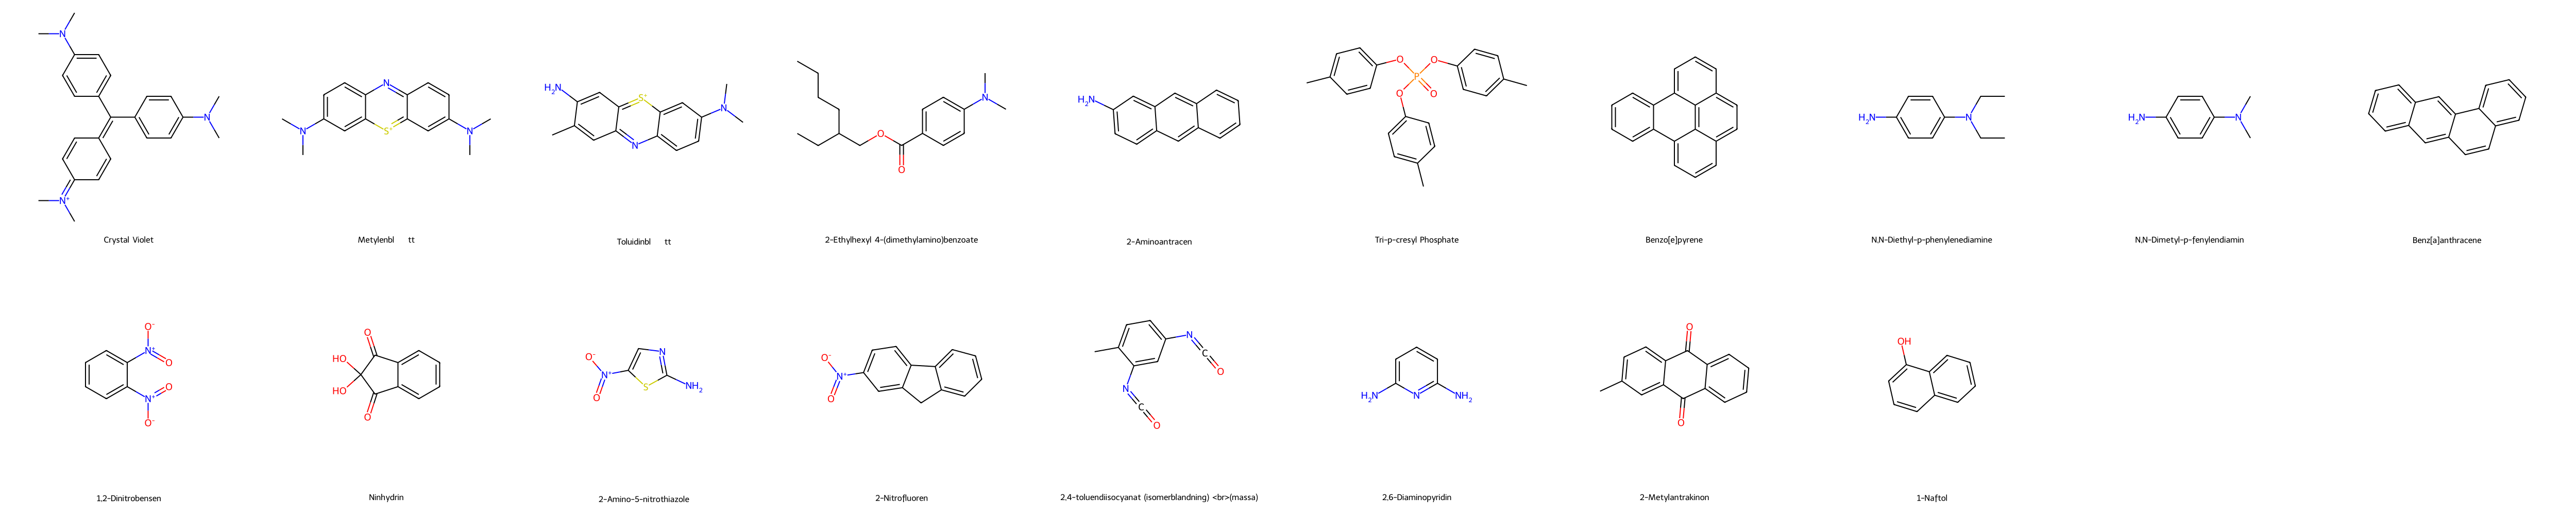

In [22]:
active_for_both = mmp_ahr_tox21[(mmp_ahr_tox21['nr.ahr'] == 1)&(mmp_ahr_tox21['sr.mmp'] == 1)]

len(active_for_both)

name_list_actives = []
for key in active_for_both['InChIKey14']:
    if key in klara['InChIKey14'].values:
        name_list_actives.append(klara[klara['InChIKey14'] == key]['Produkt'].values[0])

Draw.MolsToGridImage(active_for_both['SMILES'].apply(Chem.MolFromSmiles), molsPerRow=10, subImgSize=(500,500), legends=name_list_actives)

In [23]:
Draw.MolsToGridImage(mmp_ahr_tox21['SMILES'].apply(Chem.MolFromSmiles), molsPerRow=7, subImgSize=(1000,1000),legends=name_list)

/opt/anaconda3/envs/pubchem_cleaning/lib/python3.13/site-packages/rdkit/Chem/Draw/IPythonConsole.py:343: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


In [24]:
name_df = pd.DataFrame(name_list)
name_df.columns = ['Name']
name_df['SMILES'] = mmp_ahr_tox21['SMILES'].values
name_df.to_csv('2025-01-16_actives_in_klara_mmp_ahr_names.tsv', sep = '\t')

In [25]:
GC_LC_amenability = pd.read_csv('2025-01-16_actives_in_klara_mmp_ahr_GC_LC_amenability.txt', sep = '\t').drop('Unnamed: 0', axis = 1)

GC_LC_amenability.head()

,Name,SMILES,GC,LC
0,Myristyltrimetylammoniumbromid,CCCCCCCCCCCCCC[N+](C)(C)C,0.0,1.0
1,Crystal Violet,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)...,0.0,1.0
2,Tetrametyltiuramdisulfid,CN(C)C(=S)SSC(=S)N(C)C,1.0,1.0
3,Hexadecyltrimethylammonium chloride,CCCCCCCCCCCCCCCC[N+](C)(C)C,1.0,1.0
4,Metylenblått,CN(C)c1ccc2nc3ccc(N(C)C)cc3[s+]c2c1,1.0,1.0


In [26]:
GC_LC_amenability['GC'].value_counts()

GC
1.0    64
0.0     3
Name: count, dtype: int64

In [27]:
active_both_GC_LC = GC_LC_amenability[GC_LC_amenability['SMILES'].isin(active_for_both['SMILES'])]

active_both_GC_LC[['GC', 'LC']].value_counts()

GC   LC 
1.0  1.0    9
     0.0    7
0.0  1.0    1
Name: count, dtype: int64

In [28]:
active_both_GC_LC

,Name,SMILES,GC,LC
1,Crystal Violet,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)...,0.0,1.0
4,Metylenblått,CN(C)c1ccc2nc3ccc(N(C)C)cc3[s+]c2c1,1.0,1.0
7,Toluidinblått,Cc1cc2nc3ccc(N(C)C)cc3[s+]c2cc1N,NaN,NaN
9,2-Ethylhexyl 4-(dimethylamino)benzoate,CCCCC(CC)COC(=O)c1ccc(N(C)C)cc1,1.0,1.0
19,2-Aminoantracen,Nc1ccc2cc3ccccc3cc2c1,1.0,1.0
21,Tri-p-cresyl Phosphate,Cc1ccc(OP(=O)(Oc2ccc(C)cc2)Oc2ccc(C)cc2)cc1,1.0,1.0
24,Benzo[e]pyrene,c1ccc2c(c1)c1cccc3ccc4cccc2c4c31,1.0,0.0
31,"N,N-Diethyl-p-phenylenediamine",CCN(CC)c1ccc(N)cc1,1.0,1.0
41,"N,N-Dimetyl-p-fenylendiamin",CN(C)c1ccc(N)cc1,1.0,1.0
42,Benz[a]anthracene,c1ccc2cc3c(ccc4ccccc43)cc2c1,1.0,0.0


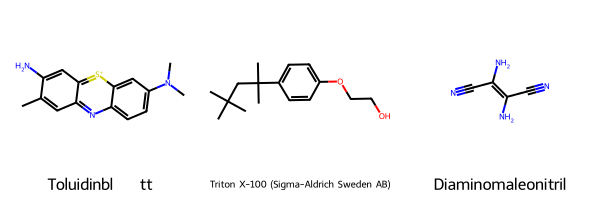

In [29]:
unknowns = GC_LC_amenability[GC_LC_amenability['GC'].isna()]

Draw.MolsToGridImage(unknowns['SMILES'].apply(Chem.MolFromSmiles), molsPerRow=3, subImgSize=(200,200),legends=list(unknowns['Name']))

Out of these, the first is probably not at good GC candidate, but the two last may work. 

In [30]:
unknowns.iloc[1,2] = 1 
unknowns.iloc[2, 2] = 1

In [31]:
GC_LC_amenability = pd.concat([GC_LC_amenability, unknowns]).drop_duplicates(subset='SMILES', keep='last').sort_index()
GC_amenability = GC_LC_amenability[GC_LC_amenability['GC'] == 1]
LC_amenability = GC_LC_amenability[GC_LC_amenability['LC'] == 1]

In [32]:
GC_klara = klara[klara['SMILES'].isin(GC_amenability['SMILES'])]
LC_klara = klara[klara['SMILES'].isin(LC_amenability['SMILES'])]

In [33]:
unknowns

,Name,SMILES,GC,LC
7,Toluidinblått,Cc1cc2nc3ccc(N(C)C)cc3[s+]c2cc1N,NaN,NaN
25,Triton X-100 (Sigma-Aldrich Sweden AB),CC(C)(C)CC(C)(C)c1ccc(OCCO)cc1,1.0,NaN
64,Diaminomaleonitril,N#CC(N)=C(N)C#N,1.0,NaN


In [34]:
mmp_active = mmp_ahr_tox21[mmp_ahr_tox21['sr.mmp'] == 1]
ahr_active = mmp_ahr_tox21[mmp_ahr_tox21['nr.ahr'] == 1]

mmp_gc = GC_LC_amenability[GC_LC_amenability['SMILES'].isin(mmp_active['SMILES'])]
ahr_gc = GC_LC_amenability[GC_LC_amenability['SMILES'].isin(ahr_active['SMILES'])]

In [36]:
len(mmp_gc)
len(ahr_gc)

42

### No overlap with KLARA

In [35]:
tox21_no_overlap = tox21[~tox21['InChIKey14'].isin(klara['InChIKey14'])]

tox21_no_overlap.shape

(3889, 21)

In [37]:
tox21_no_overlap_mmp_ahr = tox21_no_overlap[(tox21_no_overlap['sr.mmp'] == 1)|(tox21_no_overlap['nr.ahr'] == 1)]

print('Overlap between the MMP and AhR active compounds: ' + str(len(tox21_no_overlap_mmp_ahr[(tox21_no_overlap_mmp_ahr['nr.ahr'] == 1) & (tox21_no_overlap_mmp_ahr['sr.mmp'] ==1)])))
print('Unique MMP active compounds: ' + str(len(tox21_no_overlap_mmp_ahr[(tox21_no_overlap_mmp_ahr['sr.mmp'] == 1)&((tox21_no_overlap_mmp_ahr['nr.ahr'] == 0) | (tox21_no_overlap_mmp_ahr['nr.ahr'] == -999999))])))
print('Unique AhR active compounds: ' + str(len(tox21_no_overlap_mmp_ahr[(tox21_no_overlap_mmp_ahr['nr.ahr'] == 1)&((tox21_no_overlap_mmp_ahr['sr.mmp'] == 0) | (tox21_no_overlap_mmp_ahr['sr.mmp']== -999999))])))
print('All compounds which are MMP active: ' + str(len(tox21_no_overlap_mmp_ahr[(tox21_no_overlap_mmp_ahr['sr.mmp'] == 1)])))
print('All compounds which are AhR active: ' + str(len(tox21_no_overlap_mmp_ahr[(tox21_no_overlap_mmp_ahr['nr.ahr'] == 1)])))
print('Total number of active compounds for AhR and MMP: ' + str(len(tox21_no_overlap_mmp_ahr)))

Overlap between the MMP and AhR active compounds: 108
Unique MMP active compounds: 278
Unique AhR active compounds: 228
All compounds which are MMP active: 386
All compounds which are AhR active: 336
Total number of active compounds for AhR and MMP: 614


### All actives for mmp and/or ahr and where to find them

In [38]:
# find all acitve compounds for AhR and/or MMP in the tox21dataset
mmp_ahr_actives = tox21[['InChIKey14', 'SIRIUS5_fp', 'SMILES', 'nr.ahr', 'sr.mmp']]
mmp_ahr_actives = mmp_ahr_actives[(mmp_ahr_actives['nr.ahr'] == 1)|(mmp_ahr_actives['sr.mmp'] == 1)]

In [39]:
# Determine if the active compounds are in the APCI dataset (and wether LC or GC)
mmp_ahr_actives['Library_spectraGC'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in apci[apci['SeparationMethod'] == 'GC']['InChIKey14'].values else 0, axis = 1)
mmp_ahr_actives['Library_spectraLC'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in apci[apci['SeparationMethod'] == 'LC']['InChIKey14'].values else 0, axis = 1)
#mmp_ahr_actives['Library_spectra_unknown'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in apci[apci['SeparationMethod'] == 'Unknown']['InChIKey14'].values else 0, axis = 1)

In [40]:
# Determine if the active compounds are in the Iris, Isabelle or Klara datasets
mmp_ahr_actives['Iris'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in iris['InChIKey14'].values else 0, axis = 1)
mmp_ahr_actives['Isabell'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in isabelle['InChIKey14'].values else 0, axis = 1)
mmp_ahr_actives['KLARA_GC'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in GC_klara['InChIKey14'].values else 0, axis = 1)
mmp_ahr_actives['KLARA_LC'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in LC_klara['InChIKey14'].values else 0, axis = 1)

In [41]:
# Save the dataframe to a tsv file
mmp_ahr_actives.to_csv('2025-01-23_mmp_ahr_actives_chemical_availability.tsv', sep = '\t')

In [42]:
mmp_actives = mmp_ahr_actives[mmp_ahr_actives['sr.mmp'] == 1]
ahr_actives = mmp_ahr_actives[mmp_ahr_actives['nr.ahr'] == 1]

In [43]:
%pip install matplotlib_set_diagrams

  Using cached matplotlib_set_diagrams-0.0.2-py3-none-any.whl.metadata (9.7 kB)
Using cached matplotlib_set_diagrams-0.0.2-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
import matplotlib.pyplot as plt
from matplotlib_set_diagrams import EulerDiagram, VennDiagram

/opt/anaconda3/envs/pubchem_cleaning/lib/python3.13/site-packages/matplotlib_set_diagrams/_diagram_classes.py:438: UserWarning: Iteration limit reached. Could not optimise layout for the given subsets. Try a different cost function objective.
  warnings.warn(f"{result.message}. {feedback}")


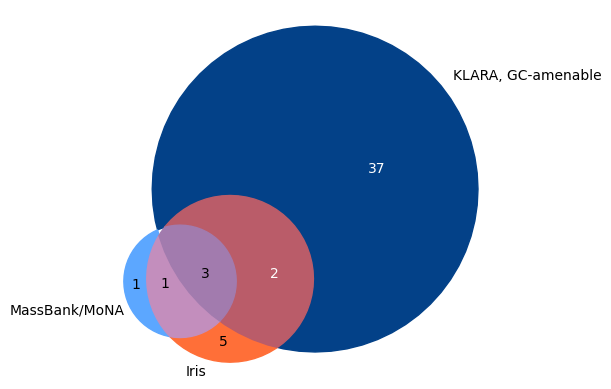

In [45]:
EulerDiagram.from_sets(
    sets = [set(mmp_actives[mmp_actives['Library_spectraGC'] == 1]['InChIKey14']),
            set(mmp_actives[mmp_actives['Iris'] == 1]['InChIKey14']),
            set(mmp_actives[mmp_actives['KLARA_GC'] == 1]['InChIKey14'])],
    set_labels = ["MassBank/MoNA", "Iris", "KLARA, GC-amenable"],
    set_colors = ['#5CA7FF', '#FF6F38', '#034188'])



Total of 49 compounds which are GC amenable or have spectra

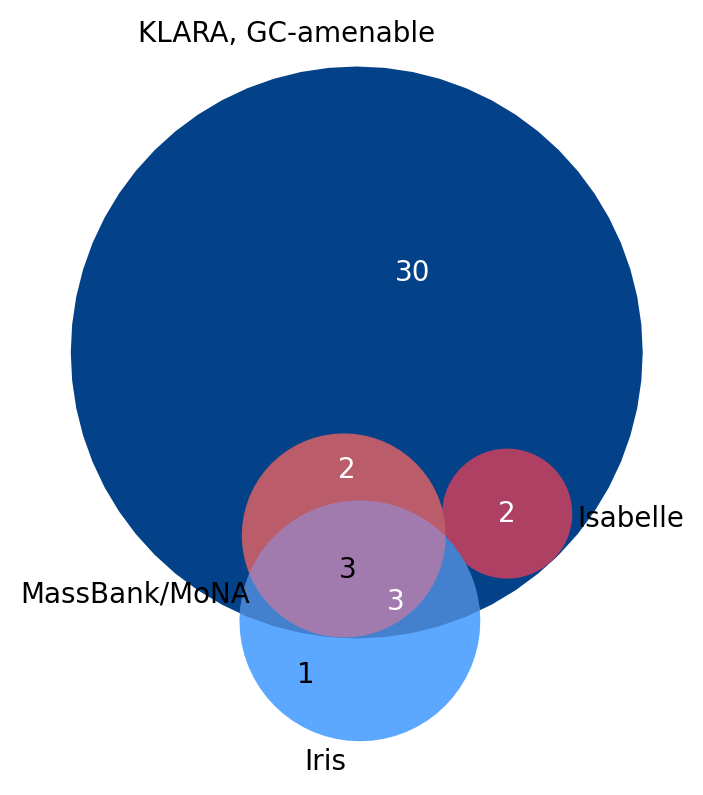

In [74]:
# euler diagram for the active compounds for AHR endpoint
EulerDiagram.from_sets(
    sets = [set(ahr_actives[ahr_actives['Library_spectraGC'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['Iris'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['Isabell'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['KLARA_GC'] == 1]['InChIKey14'])],
    set_labels = ["MassBank/MoNA", "Iris", "Isabelle", "KLARA, GC-amenable"],
    set_colors = ['#FF6F38', '#5CA7FF', '#EF3E00', '#034188'])

Total of 38 compounds which are GC amenable or have spectra

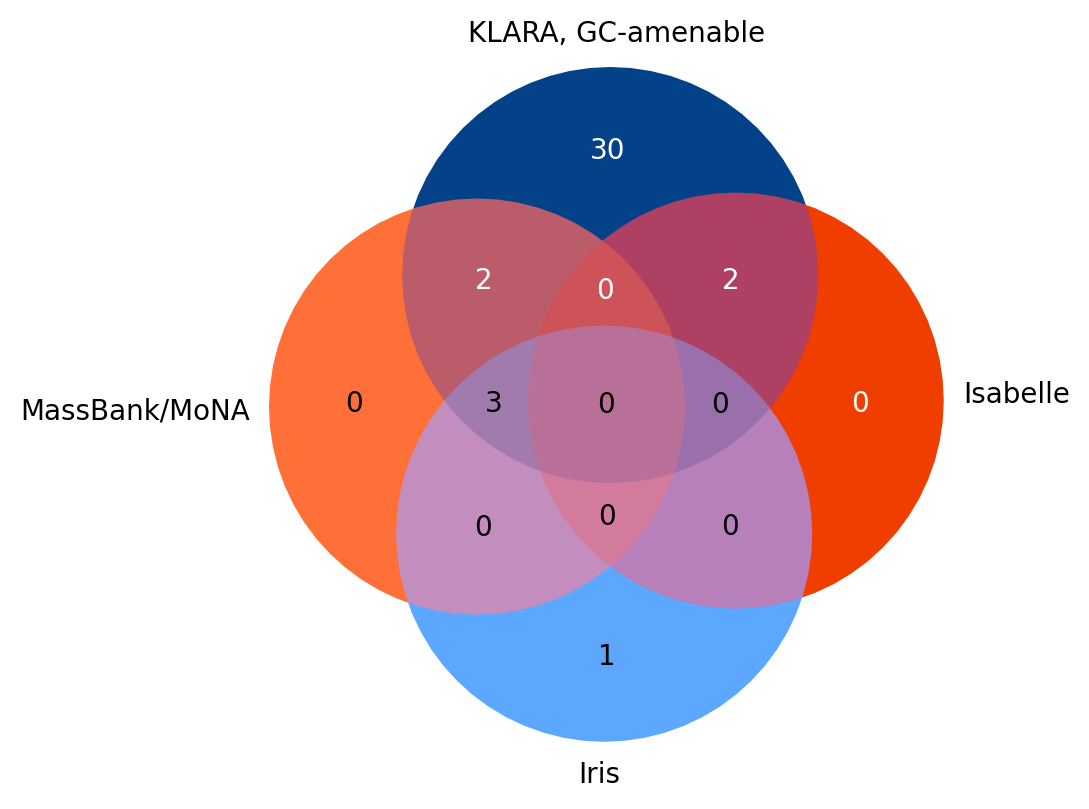

In [73]:
VennDiagram.from_sets(
    sets = [set(ahr_actives[ahr_actives['Library_spectraGC'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['Iris'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['Isabell'] == 1]['InChIKey14']),
            set(ahr_actives[ahr_actives['KLARA_GC'] == 1]['InChIKey14'])],
    set_labels = ["MassBank/MoNA", "Iris", "Isabelle", "KLARA, GC-amenable"],
    set_colors = ['#FF6F38', '#5CA7FF', '#EF3E00', '#034188'])

#### Active for both AHR and MMP   

In [46]:
ahr_mmp_actives_non_overlap = mmp_ahr_actives[(mmp_ahr_actives[['Library_spectraGC', 'Library_spectraLC', 'Iris', 'Isabell', 'KLARA_GC', 'KLARA_LC']].sum(axis = 1) == 0)]

ahr_mmp_actives_non_overlap.head()

,InChIKey14,SIRIUS5_fp,SMILES,nr.ahr,sr.mmp,Library_spectraGC,Library_spectraLC,Iris,Isabell,KLARA_GC,KLARA_LC
0,XSIOKTWDEOJMGG,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21,1,1,0,0,0,0,0,0
3,VFCNQNZNPKRXIT,1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)cc1,1,1,0,0,0,0,0,0
12,HQVZOORKDNCGCK,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,CC(C)(C)CC(C)(C)c1ccc(O)c(Cc2ccc(Cl)cc2Cl)c1,0,1,0,0,0,0,0,0
14,VYWPPRLJNVHPEU,0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,O=C(CCl)c1ccc(Cl)cc1Cl,0,1,0,0,0,0,0,0
17,YXUPZGKORWTXID,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,CCCCCCCCCCCC[N+](C)(C)CCOc1ccccc1,0,1,0,0,0,0,0,0


In [47]:
ahr_mmp_actives_non_overlap[['nr.ahr', 'sr.mmp']].value_counts()

nr.ahr   sr.mmp 
 0        1         192
 1        0         120
          1         107
         -999999    106
-999999   1          80
Name: count, dtype: int64

In [48]:
actives_no_overlap_no_inconc = ahr_mmp_actives_non_overlap[(ahr_mmp_actives_non_overlap['sr.mmp'] != -999999)&(ahr_mmp_actives_non_overlap['nr.ahr'] != -999999)][['InChIKey14', 'SIRIUS5_fp','SMILES', 'nr.ahr', 'sr.mmp']]

actives_no_overlap_no_inconc[['nr.ahr', 'sr.mmp']].value_counts()

nr.ahr  sr.mmp
0       1         192
1       0         120
        1         107
Name: count, dtype: int64

In [49]:
InChIKeyList = []
for i in range(len(actives_no_overlap_no_inconc)):
    for j in range(len(tox21)):
        if actives_no_overlap_no_inconc.iloc[i]['InChIKey14'] == tox21.iloc[j]['InChIKey14']:
            InChIKeyList.append(tox21.iloc[j]['InChIKey'])
        else: 
            pass

In [40]:
actives_no_overlap_no_inconc['InChIKey'] = InChIKeyList

In [133]:
actives_no_overlap_no_inconc.to_csv('2025-01-28_mmp_ahr_actives_unique_no_inconc.tsv', sep = '\t')

### New mixes available:
#### Which are actives? 

In [41]:
mixes = pd.read_csv('/Users/elli/Library/CloudStorage/OneDrive-Kruvelab/Ellinor - Master thesis/Code/Experimental_work/2025-01-28_Bought_mixes_and_standards_(Louise).csv', sep = ';')

#Add InChIKey14 column to the dataframe
mixes['InChIKey14'] = mixes['InChIKey'].apply(lambda x: str(x).split('-')[0])

mixes.dropna(subset = 'GC-amenable', inplace = True)
mixes.drop(labels = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],axis = 1, inplace = True)

mixes.head()

,Compound name,CAS,GC-amenable,LC-amenable,Name,LogP,InChIKey,InChIKey14
0,Irganox 1076 (Ir1076),2082-79-3,1.0,NaN,Supelco GC-Mix E&L,NaN,SSDSCDGVMJFTEQ-UHFFFAOYSA-N,SSDSCDGVMJFTEQ
1,ε-Caprolactam (CAP),105-60-2,1.0,NaN,Supelco GC-Mix E&L,NaN,JBKVHLHDHHXQEQ-UHFFFAOYSA-N,JBKVHLHDHHXQEQ
2,2-Mercaptobenzothiazole (2-MBT),149-30-4,1.0,NaN,Supelco GC-Mix E&L,NaN,YXIWHUQXZSMYRE-UHFFFAOYSA-N,YXIWHUQXZSMYRE
3,Bisphenol A (BPA),80-05-7,1.0,NaN,Supelco GC-Mix E&L,NaN,IISBACLAFKSPIT-UHFFFAOYSA-N,IISBACLAFKSPIT
4,Butylhydroxytoluene (BHT) 128-37-0,128-37-0,1.0,NaN,Supelco GC-Mix E&L,NaN,NLZUEZXRPGMBCV-UHFFFAOYSA-N,NLZUEZXRPGMBCV


In [42]:
#Compare InChIKeys between the bought mixes and the active compounds

mmp_ahr_actives['Louise_mixes'] = mmp_ahr_actives.apply(lambda x: 1 if x['InChIKey14'] in mixes['InChIKey14'].values else 0, axis = 1)

mmp_ahr_actives[mmp_ahr_actives['Louise_mixes'] == 1]

,InChIKey14,SIRIUS5_fp,SMILES,nr.ahr,sr.mmp,Library_spectraGC,Library_spectraLC,Iris,Isabell,KLARA_GC,KLARA_LC,Louise_mixes
2526,BOSMZFBHAYFUBJ,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,Cc1ccc(OP(=O)(Oc2ccc(C)cc2)Oc2ccc(C)cc2)cc1,1,1,0,0,1,0,1,1,1
2945,FTOVXSOBNPWTSH,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2c(c1)-c1cccc3c1c-2cc1ccccc13,1,-999999,1,0,0,0,1,0,1
2968,LHRCREOYAASXPZ,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2c(c1)ccc1cc3c(ccc4ccccc43)cc12,1,0,0,0,1,0,1,0,1
3150,FMMWHPNWAFZXNH,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,1,-999999,1,0,1,0,1,0,1
3455,MWPLVEDNUUSJAV,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2cc3ccccc3cc2c1,-999999,1,1,0,1,0,1,0,1
4119,DXBHBZVCASKNBY,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2cc3c(ccc4ccccc43)cc2c1,1,1,1,0,1,0,1,0,1
4359,GPAPPPVRLPGFEQ,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,O=S(=O)(c1ccc(Cl)cc1)c1ccc(Cl)cc1,0,1,0,0,0,0,0,0,1
4378,GVEPBJHOBDJJJI,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2c(c1)-c1cccc3cccc-2c13,0,1,1,0,1,0,1,0,1
4841,WDECIBYCCFPHNR,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,c1ccc2c(c1)ccc1c3ccccc3ccc21,1,0,1,0,1,0,1,0,1


/var/folders/0w/cl6vcbp52mjfxw4v9_2l1_780000gn/T/ipykernel_28892/3497799645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  louise_active_unique['ROMol'] = louise_active_unique['SMILES'].apply(Chem.MolFromSmiles)


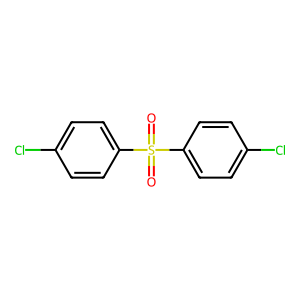

In [43]:
louise_active_unique = mmp_ahr_actives[mmp_ahr_actives['InChIKey14']=='GPAPPPVRLPGFEQ']

louise_active_unique['ROMol'] = louise_active_unique['SMILES'].apply(Chem.MolFromSmiles)

Draw.MolToImage(louise_active_unique['ROMol'].values[0])


### Actives not available in library spectra or in KLARA

In [45]:
colname_list = ['Library_spectraGC', 'Library_spectraLC', 'Iris', 'Isabell', 'KLARA_GC', 'KLARA_LC', 'Louise_mixes']

unique_compounds = mmp_ahr_actives[(mmp_ahr_actives[colname_list[0]] == 0)&
                                   (mmp_ahr_actives[colname_list[1]] == 0)&
                                   (mmp_ahr_actives[colname_list[2]] == 0)&
                                   (mmp_ahr_actives[colname_list[3]] == 0)&
                                   (mmp_ahr_actives[colname_list[4]] == 0)&
                                   (mmp_ahr_actives[colname_list[5]] == 0)&
                                   (mmp_ahr_actives[colname_list[6]] == 0)] #Get actives not found anywhere

### Actives available in KLARA

In [82]:
klara_active = mmp_ahr_actives[mmp_ahr_actives['KLARA_GC'] == 1]

klara_active = klara[klara['InChIKey14'].isin(klara_active['InChIKey14'])]

In [85]:
#Add the endpoints to the klara_active dataframe
klara_active['nr.ahr'] = klara_active['InChIKey14'].apply(lambda x: tox21[tox21['InChIKey14'] == x]['nr.ahr'].values[0])
klara_active['sr.mmp'] = klara_active['InChIKey14'].apply(lambda x: tox21[tox21['InChIKey14'] == x]['sr.mmp'].values[0])

klara_active

/var/folders/0w/cl6vcbp52mjfxw4v9_2l1_780000gn/T/ipykernel_28892/808798652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klara_active['nr.ahr'] = klara_active['InChIKey14'].apply(lambda x: tox21[tox21['InChIKey14'] == x]['nr.ahr'].values[0])
/var/folders/0w/cl6vcbp52mjfxw4v9_2l1_780000gn/T/ipykernel_28892/808798652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klara_active['sr.mmp'] = klara_active['InChIKey14'].apply(lambda x: tox21[tox21['InChIKey14'] == x]['sr.mmp'].values[0])


,Produkt,CAS,EG-nummer,Typ,Mängd,Enhet,Byggnad,Våning,Rum,Lagring,Avdelning,KLARA id,SMILES,molecular_formula,molecular_mass,ROMol,InChIKey,InChIKey14,nr.ahr,sr.mmp
54,Parathion-methyl,298-00-0,206-050-1,Inventering,100.0,mg,Arrheniuslaboratoriet Hus A,Plan 3,A312,Frys,Group Anneli Kruve,98406,COP(=S)(OC)Oc1ccc([N+](=O)[O-])cc1,C8H10NO5PS,263.207620,<rdkit.Chem.rdchem.Mol object at 0x304cf0350>,RLBIQVVOMOPOHC-UHFFFAOYSA-N,RLBIQVVOMOPOHC,1,0
63,Tetrametyltiuramdisulfid,137-26-8,205-286-2,Inventering,250.0,mg,Arrheniuslaboratoriet Hus A,Plan 3,A312,Frys,Group Anneli Kruve,11267,CN(C)C(=S)SSC(=S)N(C)C,C6H12N2S4,240.432338,<rdkit.Chem.rdchem.Mol object at 0x304cc0cf0>,KUAZQDVKQLNFPE-UHFFFAOYSA-N,KUAZQDVKQLNFPE,0,1
64,Thiabendazole,148-79-8,205-725-8,Inventering,250.0,mg,Arrheniuslaboratoriet Hus A,Plan 3,A312,Frys,Group Anneli Kruve,19921,c1ccc2[nH]c(-c3cscn3)nc2c1,C10H7N3S,201.247896,<rdkit.Chem.rdchem.Mol object at 0x304cc0e40>,WJCNZQLZVWNLKY-UHFFFAOYSA-N,WJCNZQLZVWNLKY,1,0
81,Antracen,120-12-7,204-371-1,NaN,NaN,NaN,Arrheniuslaboratoriet Hus A,Plan 3,A312,Kemikalieskåp,Group Leopold Ilag,10769,c1ccc2cc3ccccc3cc2c1,C14H10,178.229770,<rdkit.Chem.rdchem.Mol object at 0x3044052e0>,MWPLVEDNUUSJAV-UHFFFAOYSA-N,MWPLVEDNUUSJAV,-999999,1
105,Lindan,58-89-9,200-401-2,NaN,NaN,NaN,Arrheniuslaboratoriet Hus A,Plan 3,A312,Kemikalieskåp,Group Leopold Ilag,11215,ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,C6H6Cl6,290.829486,<rdkit.Chem.rdchem.Mol object at 0x304a53970>,JLYXXMFPNIAWKQ-UHFFFAOYSA-N,JLYXXMFPNIAWKQ,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,"1,2,4-Triazol",288-88-0,206-022-9,Inventering,100.0,g,Arrheniuslaboratoriet Hus C,Plan 5,C521e,Plåtskåp 3/Chemicals,Group Xiaodong Zou,11539,c1nc[nH]n1,C2H3N3,69.065412,<rdkit.Chem.rdchem.Mol object at 0x304c16f20>,NSPMIYGKQJPBQR-UHFFFAOYSA-N,NSPMIYGKQJPBQR,1,0
1453,"N,N-Dimetyl-p-fenylendiamin",99-98-9,202-807-5,Inventering,50.0,g,Arrheniuslaboratoriet Hus C,Plan 5,C521e,Plåtskåp 3/Chemicals,Group Xiaodong Zou,33878,CN(C)c1ccc(N)cc1,C8H12N2,136.194618,<rdkit.Chem.rdchem.Mol object at 0x30dd97200>,BZORFPDSXLZWJF-UHFFFAOYSA-N,BZORFPDSXLZWJF,1,1
1462,p-Toluidin,106-49-0,203-403-1,Inventering,250.0,g,Arrheniuslaboratoriet Hus C,Plan 5,C521e,Plåtskåp 3/Ken Inge Group,Group Xiaodong Zou,10345,Cc1ccc(N)cc1,C7H9N,107.153352,<rdkit.Chem.rdchem.Mol object at 0x30dd97820>,RZXMPPFPUUCRFN-UHFFFAOYSA-N,RZXMPPFPUUCRFN,1,0
1528,"N,N-Diethyl-p-phenylenediamine",93-05-0,202-214-1,Inventering,25.0,g,Arrheniuslaboratoriet Hus C,Plan 5,C569,Kemikalieskåp C569-1/1 - Organic chemicals,Group Mats Johnsson,97966,CCN(CC)c1ccc(N)cc1,C10H16N2,164.247862,<rdkit.Chem.rdchem.Mol object at 0x304c0ac10>,QNGVNLMMEQUVQK-UHFFFAOYSA-N,QNGVNLMMEQUVQK,1,1


In [81]:
klara_active.Avdelning.value_counts()

klara_active_analytical = klara_active[(klara_active['Byggnad'] == 'Arrheniuslaboratoriet Hus A')|(klara_active['Byggnad'] == 'Arrheniuslaboratoriet Hus B')]

In [77]:
klara_active_analytical['Avdelning'].value_counts()

Avdelning
Group Ioannis Sadiktsis    17
Group CÖ_UN                15
Group Anneli Kruve         10
Kurslab_AK                  5
Group Leopold Ilag          3
Masslab                     3
Group Jan Holmbäck          2
Name: count, dtype: int64

In [93]:
print(klara_active_analytical.value_counts('nr.ahr'))
print(klara_active_analytical.value_counts('sr.mmp'))
print(klara_active_analytical.value_counts(['nr.ahr', 'sr.mmp']))

nr.ahr
 1         32
 0         16
-999999     7
Name: count, dtype: int64
sr.mmp
 1         35
 0         13
-999999     7
Name: count, dtype: int64
nr.ahr   sr.mmp 
 0        1         16
 1        0         13
          1         12
-999999   1          7
 1       -999999     7
Name: count, dtype: int64


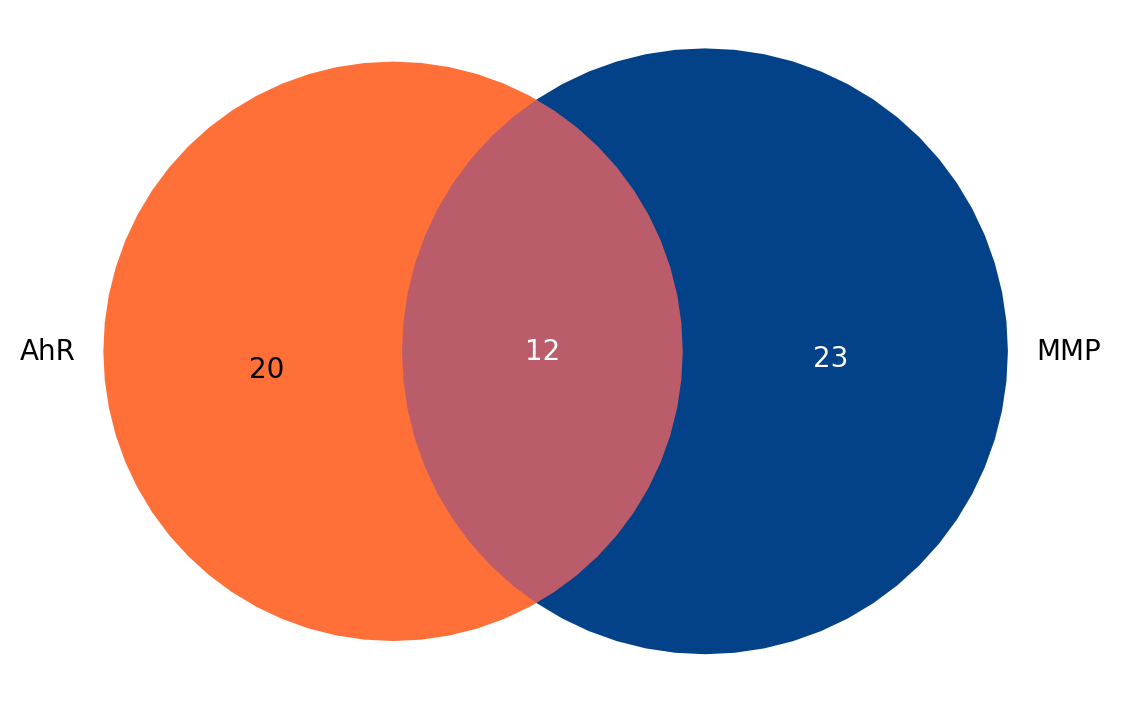

In [94]:
EulerDiagram.from_sets(
    sets = [set(klara_active_analytical[klara_active_analytical['nr.ahr'] == 1]['InChIKey14']),
            set(klara_active_analytical[klara_active_analytical['sr.mmp'] == 1]['InChIKey14'])],
    set_labels = ["AhR", "MMP"],
    set_colors = ['#FF6F38', '#034188'])

In [ ]:
''